# TASK:
* City with cheap restaurants
* City with most expensive restaurants
* Restaurant with largest number of votes
* City with largest number of votes
* City with excellent rating

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-data/zomato.csv
/kaggle/input/zomato-restaurants-data/file5.json
/kaggle/input/zomato-restaurants-data/file1.json
/kaggle/input/zomato-restaurants-data/file2.json
/kaggle/input/zomato-restaurants-data/file4.json
/kaggle/input/zomato-restaurants-data/file3.json
/kaggle/input/zomato-restaurants-data/Country-Code.xlsx


In [2]:
pip install openpyxl


     |████████████████████████████████| 242 kB 419 kB/s 
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=5130038dbd173f4cd347654ade7e8c7fe87670914f30644780987c23aa4cc5b2
  Stored in directory: /root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('/kaggle/input/zomato-restaurants-data/zomato.csv',encoding="ISO-8859-1")
df_c = pd.read_excel('/kaggle/input/zomato-restaurants-data/Country-Code.xlsx')

# lets check first 5 rows

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df_c.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


# lets combine both df and df_c since they have column country code

In [6]:

data = pd.merge(df, df_c, on='Country Code')

In [7]:
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


# TASK1: City with cheapest restaurants

In [8]:
conditions = [
    (data['Currency'] == "Botswana Pula(P)"),
    (data['Currency'] == "Brazilian Real(R$)"),
    (data['Currency'] == "Dollar($)"),
    (data['Currency'] == "Emirati Diram(AED)"),
    (data['Currency'] == "Indian Rupees(Rs.)"),
    (data['Currency'] == "Indonesian Rupiah(IDR)"),
    (data['Currency'] == "NewZealand($)"),
    (data['Currency'] == "Pounds(\x8c£)"),
    (data['Currency'] == "Qatari Rial(QR)"),
    (data['Currency'] == "Rand(R)"),
    (data['Currency'] == "Sri Lankan Rupee(LKR)"),
    (data['Currency'] == "Turkish Lira(TL)")
    ]

In [9]:
values = [data['Average Cost for two']*10.97,data['Average Cost for two']*5.34,data['Average Cost for two']*1.0,data['Average Cost for two']*3.67 ,data['Average Cost for two']*72.74,data['Average Cost for two']*13967.10,data['Average Cost for two']*1.38,data['Average Cost for two']*0.72,data['Average Cost for two']*3.64,data['Average Cost for two']*14.62,data['Average Cost for two']*193.98,data['Average Cost for two']*7.02]

In [10]:
data['Average Cost for two'] = np.select(conditions, values)

In [11]:
city_cost=data.groupby('City')['Average Cost for two'].mean().sort_values(ascending=True)

In [12]:
city_cost.head()

City
Miller             0.0
Inverloch          7.0
Lakes Entrance     7.0
Dicky Beach        7.0
Mc Millan         10.0
Name: Average Cost for two, dtype: float64

ANS:CITY WITH CHEAPEST RESTUARANT IS MILLER WITH AN AVERAGE COST OF $0.0 FOR TWO PEOPLE WHEN 'AVERAGE COST FOR TWO' IS CALCULATED FOR ALL RESTUARANTS OR RESTUARANT IN THE CITY 

# TASK2: City with most expensive restaurants

In [13]:
city_cost=data.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False)

<AxesSubplot:xlabel='City'>

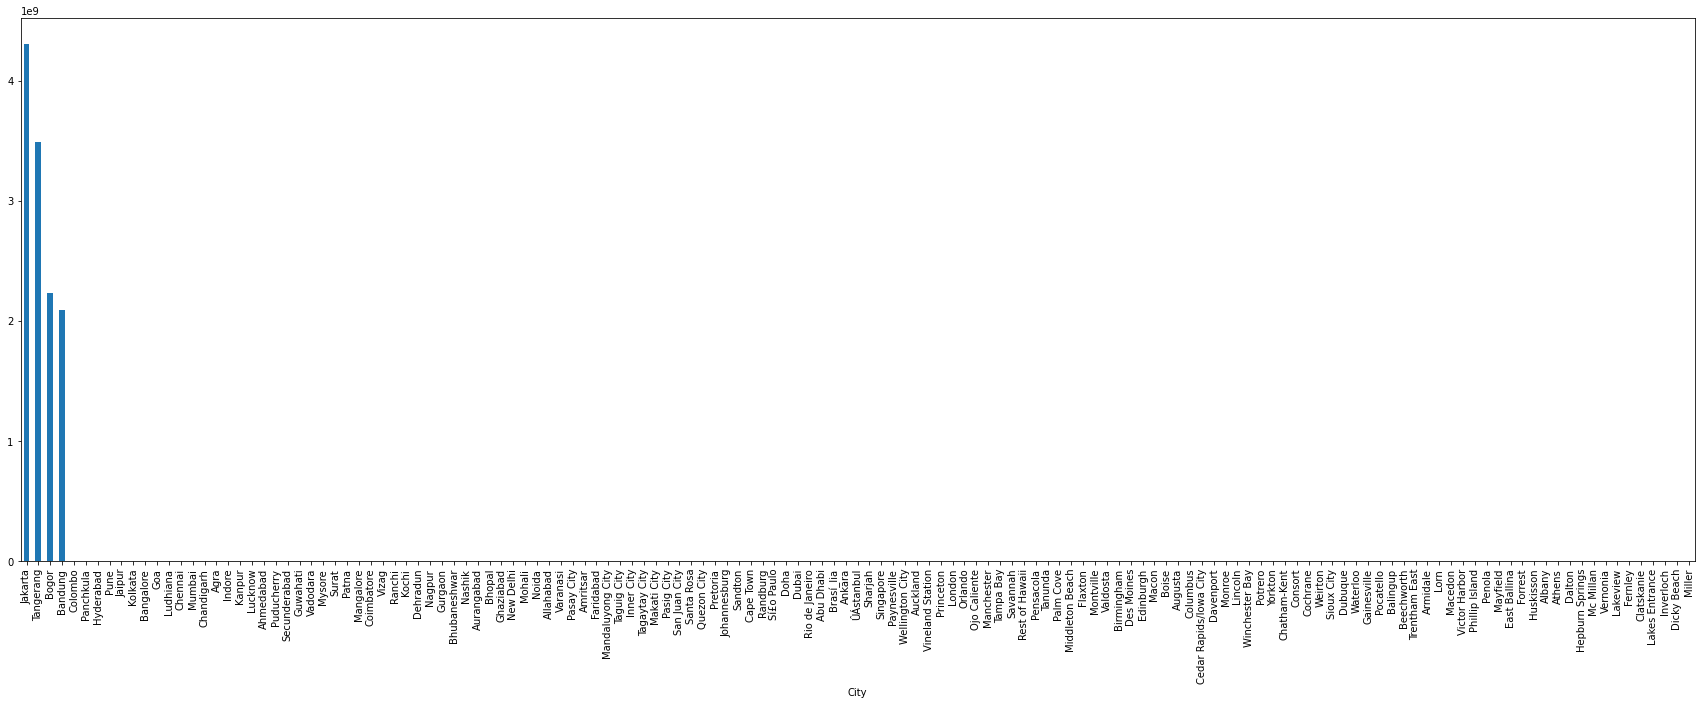

In [14]:
plt.figure(figsize=(30,10))
city_cost.plot(kind='bar')

In [15]:
city_cost.head()

City
Jakarta      4.307977e+09
Tangerang    3.491775e+09
Bogor        2.234736e+09
Bandung      2.095065e+09
Colombo      4.607025e+05
Name: Average Cost for two, dtype: float64

ANS:CITY WITH MOST EXPENSIVE RESTUARANTS IS JAKARTA WITH AN AVERAGE COST OF $4.307977e+09 FOR TWO PEOPLE WHEN 'AVERAGE COST FOR TWO' IS CALCULATED FOR ALL RESTUARANTS IN THE CITY 

# TASK3:Restaurant with largest number of votes

In [16]:
Res_vote=data.groupby('Restaurant Name')['Votes'].mean().sort_values(ascending=False)

In [17]:
Res_vote.head()

Restaurant Name
Toit                10934.0
Hauz Khas Social     7931.0
Peter Cat            7574.0
Big Brewsky          5705.0
The Black Pearl      5385.0
Name: Votes, dtype: float64

ANS:RESTUARANTS WITH LARGEST NUMBER OF VOTE IS **TOIT** WITH AN AVERAGE VOTE OF 10,934.0

# TASK4: City with largest number of votes

In [18]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [19]:
city_vote=data.groupby(['City'])['Votes'].mean().sort_values(ascending=False)

In [20]:
city_vote.head()

City
Bangalore    2805.75
Kolkata      2229.65
Mumbai       1484.85
Chennai      1384.75
Tampa Bay    1370.35
Name: Votes, dtype: float64

ANS:CITY WITH THE LARGETS NUMBER OF VOTES IS BANGALORE

# TASK5:City with Most excellent rating

In [21]:
city_vote=data.groupby(['Rating text'])['City'].value_counts().sort_values(ascending=True)

In [22]:
city_excellent=data[data['Rating text']=='Excellent']

In [23]:
city_excellent[['Rating text','City']]

,Rating text,City
0,Excellent,Makati City
1,Excellent,Makati City
3,Excellent,Mandaluyong City
4,Excellent,Mandaluyong City
8,Excellent,Pasay City
...,...,...
9537,Excellent,ÛÁstanbul
9538,Excellent,ÛÁstanbul
9540,Excellent,ÛÁstanbul
9543,Excellent,ÛÁstanbul


In [24]:
city_rating=city_excellent.groupby(['Rating text'])['City'].value_counts().sort_values(ascending=False)

In [25]:
city_rating

Rating text  City          
Excellent    New Delhi         28
             London            15
             Gurgaon           12
             Rio de Janeiro    11
             Tampa Bay         10
                               ..
             Dehradun           1
             Brasí_lia          1
             Beechworth         1
             Agra               1
             Tangerang          1
Name: City, Length: 74, dtype: int64

ANS: NEW DELHI HAS RESTUARANTS WITH THE MOST EXCELLENT RATINGS